In [22]:
import numpy as np
import pandas as pd
import math
N = 5000

def data(mu):
    x = np.random.normal(mu, 1, N)
    label = np.random.rand(N) > 0.5
    x[label] -= mu*2
    label = np.array(list(map(lambda x: -mu if x else mu, label)))
    df = pd.DataFrame(list(zip(x, label)), columns = ['s', 'y']) 
    df['p'] = 1 / (1 + math.e**(-(2)*df.s))
    return(df)

In [23]:
def Inverse(df, mu):
    MS = 0.0
    for index, row in df.iterrows():
        s = row.p
        if (row.y == -mu): #f0
            if(s < 0.5):
                MS += (2*s-1)/(2*(s-1)**2) + 0.5
            else:
                MS += -1/s + 2.5
        else: #f1
            if(s < 0.5):
                MS += -1/(1-s) + 2.5
            else:
                MS += (1-2*s)/(2*s**2) + 0.5
    return(MS/N/3)

In [24]:
def total_cost(df, mu):
    n = 1000 #iterations
    total_cost = 0
    for i in range(0, n):
        c0 = np.random.random()
        c1 = np.random.random()  
        c = c0/(c0+c1)
        df['pred_y'] = (df.p > (1-c)).astype(int)*2*mu - mu
        fp = df.loc[(df.y == mu) & (df.pred_y != mu)].shape[0]  
        fn = df.loc[(df.y != mu) & (df.pred_y == mu)].shape[0] 
        total_cost += fp*c0 + fn*c1
    return(total_cost/n/N)

In [25]:
mus = [0.1, 0.3, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
a = []
for mu in mus:    
    a.append([mu, Inverse(data(mu),mu), total_cost(data(mu),mu)])

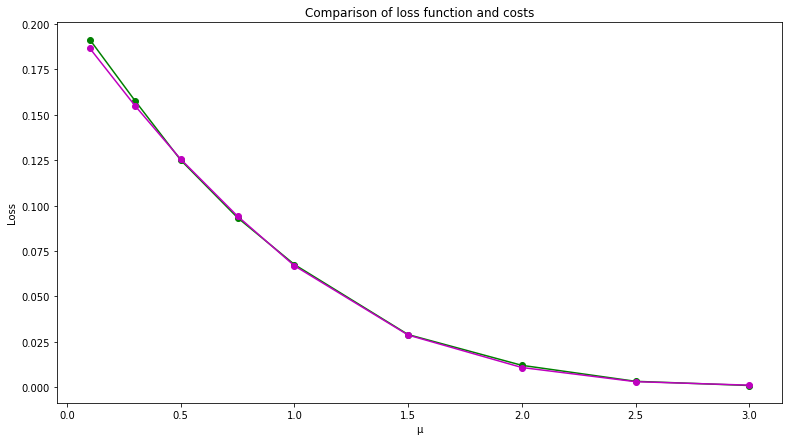

In [26]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(13, 7)
fig.savefig('test2png.png', dpi=100)
plt.xlabel('μ')
plt.ylabel('Loss')
plt.plot([row[0] for row in a], [row[2] for row in a], '-o', c='g')
plt.plot([row[0] for row in a], [row[1] for row in a], '-o', c='m')
plt.title('Comparison of loss function and costs')
plt.show()